In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans

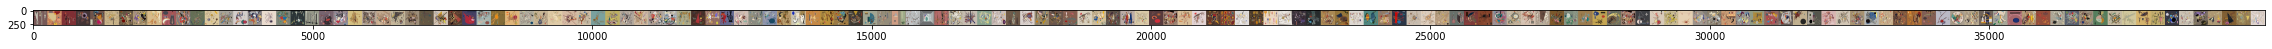

In [19]:
def llaveSort(cuadro):
    if cuadro != ".DS_Store":
        return int(cuadro.replace(".jpg",""))
    else:
        return -1

directorio = os.listdir("./k_post")
directorio.sort(key=llaveSort)

cuadros = []

i=0
for cuadro in directorio:
    i=i+1
    if cuadro != ".DS_Store" and i%2!=0:
        img = cv2.imread(os.path.join("./k_post",cuadro))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cuadros.append(img)
        

cuadrote = np.concatenate(tuple(cuadros),axis=1)

fig = plt.figure(figsize=(40,100))
plt.imshow(cuadrote)

In [22]:
cuadrote = cuadrote.reshape((-1, 3))
kmeans = KMeans(n_clusters=40)
kmeans.fit(cuadrote)

KMeans(n_clusters=40)

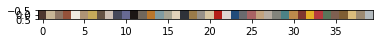

In [26]:
def palette(clusters):
    width=40
    palette = np.zeros((10, width, 30), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

plt.imshow(palette(kmeans))

In [36]:
paleta = palette(kmeans)
paleta = paleta.reshape((40,3))
#print(paleta.shape)
np.savetxt('paleta.csv',paleta,delimiter=",")

In [37]:
print(paleta)

[[ 77  55  47]
 [199 181 150]
 [142 118 101]
 [148  81  58]
 [240 235 226]
 [175 148 117]
 [198 170  90]
 [101  83  69]
 [205 191 180]
 [ 69  72  90]
 [104 106 147]
 [ 28  23  21]
 [112 103  92]
 [185 119  45]
 [128 155 161]
 [168 164 146]
 [226 210 186]
 [ 47  50  57]
 [154 123  74]
 [152 145 137]
 [216 197 161]
 [180  31  25]
 [223 215 209]
 [ 33  76 122]
 [106 106 110]
 [169  99 100]
 [194 162 126]
 [183 172 161]
 [131 132 124]
 [ 76 130 134]
 [189 138  76]
 [127  54  47]
 [227 174  39]
 [182  58  62]
 [ 89 118  90]
 [127  96  81]
 [127  94  51]
 [218 188 124]
 [156 138 114]
 [179 186 190]]
